<a href="https://colab.research.google.com/github/RaiqaRasool/ml_training/blob/main/10_Adam_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adam Optimizer
`Adam optimizer requires understanding of: `
* Gradient Descent and its types:
  * Stochastic gradient descent
  * Mini Batch Gradient Descent
  * Batch Gradient Descent
* Exponentially Weighted Moving Average (EWMA)
* SGD with momentum
* AdaGrad
* RMSProp
* Adam Optimizer

## [Gradient Descent](https://youtu.be/7z6yXpYk7sw?si=j98wkfq7ZpIH2WIV)

Gradient descent is a way to minimize an objective function (e.g. loss function) by updating parameters in the opposite direction of the gradient of objective function w.r.t. to parameters. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach a valley.

### Types of Gradient Descent
 The three variants of gradient descent differ in how much data is used to compute the gradient of the objective function. Depending on the amount of data, a trade-off is done between the accuracy of the parameters update and the time it takes to train.

#### Batch GD (Vanilla GD)
* `No. of weight updates = No. of Epochs`

* `batch_size = data size`
* Derivative of each weight is calculated against average of losses during whole epoch

**Advantages**
* Lesser time for each epochs to complete
* Stable change in loss

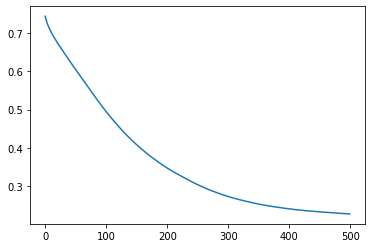

**Disadvantage**
* Converge slower -- need more epochs to reach solution
* Local minima problem
* Large batch size can lead to memory overflow because whole batch has to be loaded into the memory to perform dot product using vectorization

#### Stochastic Gradient Descent
* `No. of weight updates = Epochs * len(data points)`
* batch_size = 1

**Advantages:**
* Fast convergence -- need lesser epochs to reach the target loss
* Less chances of getting stuck in local minima due to unstable change in loss

**Disadvantages**
* Computationally costly
* More time for each epoch to complete
* Unstable change in loss which leads to only approx value not exact

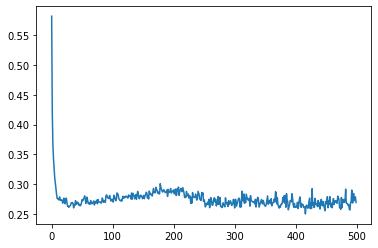

#### Mini Batch GD -- most commonly used

* Whole data divided into small batches
* Weights are updated based on the average of all the losses corresponding to data points in one batch
* More than one updates happen within an epoch .i.e. `No. of updates = data_size/batch_size`

**Advantages**
* No memory overflow
* More stable loss updates compared to SGD
* Faster convergence compared to BGD
* Less computationally costly than SGD

## [Exponentially Weighted Moving Average](https://youtu.be/jAqVuYJ8TP8?si=MctwFv4T2Vkl0bFG)

`Current updates are influenced by previous ones`

$V_{t}$= $βV_{t-1} + (1-β)θ_{t}$



* β = importance given to previous gradient
* $V_{t-1}$ = previous gradients sum
* (1-β) = importance given to current gradient
* $θ_{t}$ = current gradient


The influence of most recent gradients on $V_{t}$ is more than the gradients that were too earlier than current.
$$
V_{4} = (1-β)[β^3θ_{1} + β^2θ_{2} + βθ_{3} + θ_{4}]
$$

As shown by the equation above that previous Θs are being multiplied by higher powers of β and as β value is between 0 to 1 thus higher powers of β means smaller value and as a result lesser role of the corresponding θ in calculating current $V_{t}$. This approach avoids the unstable changes in loss as seen for SGD.

**Relationship between β value and data points whose gradient is being considered**

Number of previous data points whose gradient is being considered = ${\displaystyle \frac{1}{1-β}}$

## [SGD with Momentum](https://youtu.be/vVS4csXRlcQ?si=A5Yu-0zscvjkj23P)

`solve local minima and saddle point issues for non-convex loss functions by having influence of previous gradients on current gradient as explained in EWMA`

$$
w_{t+1} = w_{t} - v_{t}$$

$$v_{t} = βv_{t-1} + ηΔw_{t}
$$


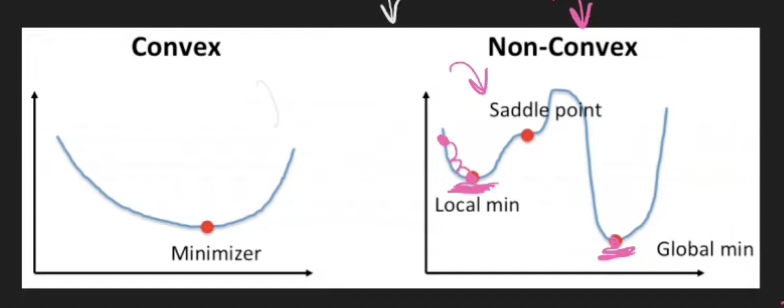

* Local minima: Sub optimal solution not the lowest value of loss
* Saddle point: Point around which slope changes negligible level slow

**Advantages:**
* Big updates in the direction of solution because of previous gradients and current gradients having the same direction. This leads to earlier convergence


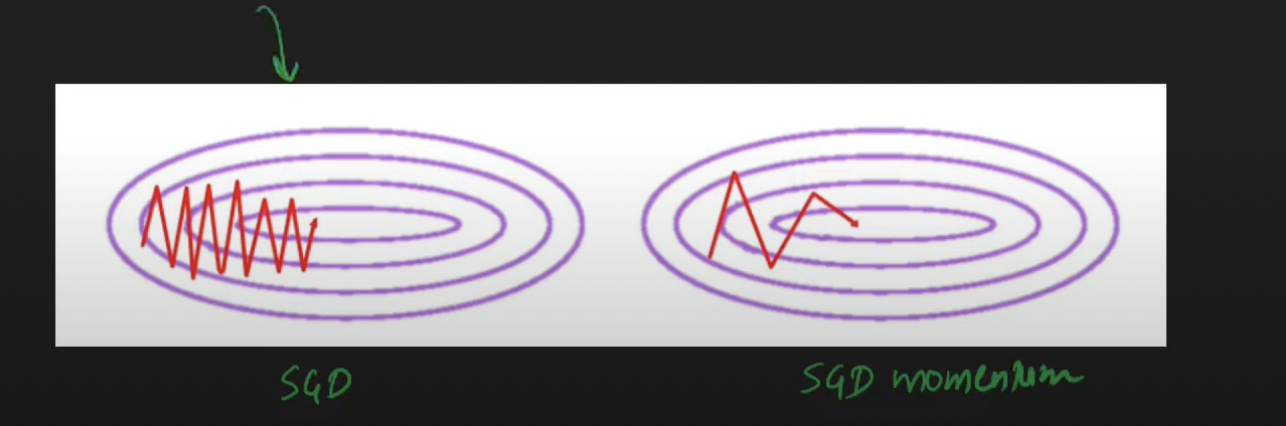

**Disadvantages**
* A lot of oscillation around the actual solution because of high velocity thus a few epochs are wasted

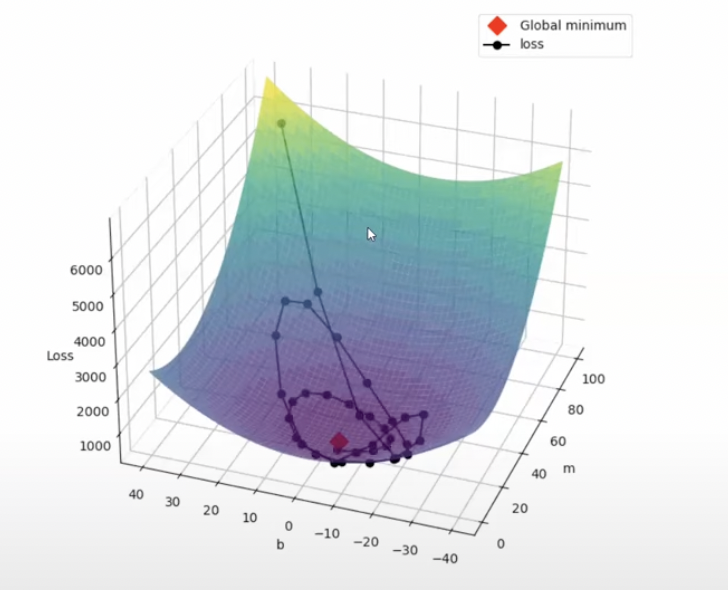

## [Nesterov Accelerated Gradient (NAG)](https://youtu.be/rKG9E6rce1c?si=ITinyKKulNIJR8L3)

`damp the oscillations around minima that were occuring in case of SGD momentum due to velocity`
* First find $w_{la}$
$$
w_{la} = w_{t} - βv_{t-1}
$$
* Now calculate gradient of loss with respect to $w_la$
$$
v_{t} = βv_{t-1} + ηΔw_{la}
$$
* Use this $v_{t}$ to find $w_{t+1}$ now as:
$$w_{t+1} = w_{t} - v_{t}$$





## [AdaGrad (Adaptive Gradient)](https://youtu.be/nqL9xYmhEpg?si=6HWhAblOxZllYh1K)


`Different learning rates for different parameters -- ideal for sparse features`

$$
w_{t+1} = w_{t} - {\displaystyle \frac{η Δw_{t}}{\sqrt{v_{t}+ϵ}}}
$$

$$
v_{t}=v_{t-1} + (Δw_{t})^2
$$

If one of the features is sparse then change in the weights representing that feature will be much smaller than the other weights and hence movement in that features dimension will be lesser while it will be higher for others. To cop up this, learning rate is divided by sum of previous gradients for a particular weight so that if the gradients for it are larger then its learning rate will be made much smaller to have a similar update for all the weights.

ϵ: a small value to avoid infinity when $v_{t}$ is zero

**Disadvantage:**
* Sum of gradients become too high after large number of updates that make learning rate too small and hence very very small changes occur in the parameters. That is the reason why AdaGrad can never reach the exact minima but can just reach closer to it in the case of complex large models.

## [RMSProp - Root Mean Square Propagation](https://youtu.be/p0wSmKslWi0?si=Mq4BcktOGWEayB7r)
`Saves learning rate from becoming too small as it was happening in case of AdaGrad`

$$
w_{t+1} = w_{t} - {\displaystyle \frac{η Δw_{t}}{\sqrt{v_{t}+ϵ}}}
$$

$$
v_{t}=βv_{t-1} -(1-β)(Δw_{t})^2
$$

Difference is in how $v_{t}$ is being calculated. It is using EWMA approach here.

## [Adam Optimizer](https://youtu.be/N5AynalXD9g?si=KxKf6iYKl0iePA7r)

`SGD with Momentum + RMS Prop`

$$
w_{t+1} = w_{t} - {\displaystyle \frac{η}{\sqrt{v_{t}+ϵ}}* m_{t}}
$$

**Momentum:**
$$
m_{t}=β_{1}m{t-1} + (1-Β_{1})Δw_{t}
$$

**AdaGrad:**
$$
v_{t} = β_{2}v_{t-1} + (1-β_{2}) (Δw_{t})^2
$$

### Adam Optimizer in Pytorch

```python
torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
```

weight_decay = L2 regularization strength
**Detail of weight_decay:**
L2 is sum of all weights squares:
$$
L2= Σ w_{k}^2
$$
It is added to loss, thus gradient for larger weight will be bigger and hence making that weight smaller, overcoming overfitting.

$$
Loss(w,b) = Loss (w,b) + λL2
$$

λ = weight_decay


